In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (20,6) # width, height

In [2]:
# the varyHitI_2000 has the exact parameter specification by Yao Li. Still, the strongest and weakest driveI have
# very similar patterns
# filename = './strict parameters/varyHitI_2000.txt'
filename = './dataHitI_smallDrive/varyHitI_2000.txt'

data = np.loadtxt(filename)
data

array([[707.662, 154.   ,   1.   , ...,   7.   ,  11.   ,  10.   ],
       [290.051,  43.   ,   1.   , ...,  14.   ,  19.   ,   8.   ],
       [438.032,  19.   ,  20.   , ...,  10.   ,  19.   ,  13.   ],
       ...,
       [301.405,   0.   ,   0.   , ...,  11.   ,  24.   ,  11.   ],
       [602.476,   0.   ,   0.   , ...,   7.   ,  12.   ,  11.   ],
       [756.311,   0.   ,   0.   , ...,  12.   ,  13.   ,   8.   ]])

In [3]:
# plt.figure(figsize = (20, 6)) # width, height
def plot_hist(data_bins, title):
    xs = list(range(200))
    # sum of I and E spikes
    bins_total = data_bins[:200] + data_bins[200:]
    sns.barplot(xs, bins_total, color='red')
    sns.barplot(xs, data_bins[:200], color='blue')
    plt.title(title)

In [4]:
bins_first = data[np.argmax(data[:,0]), 1:]
bins_second = data[np.argmin(data[:,0]), 1:]

print('max', np.max(data[:,0]))
print('min', np.min(data[:,0]))

max 787.707
min 207.969


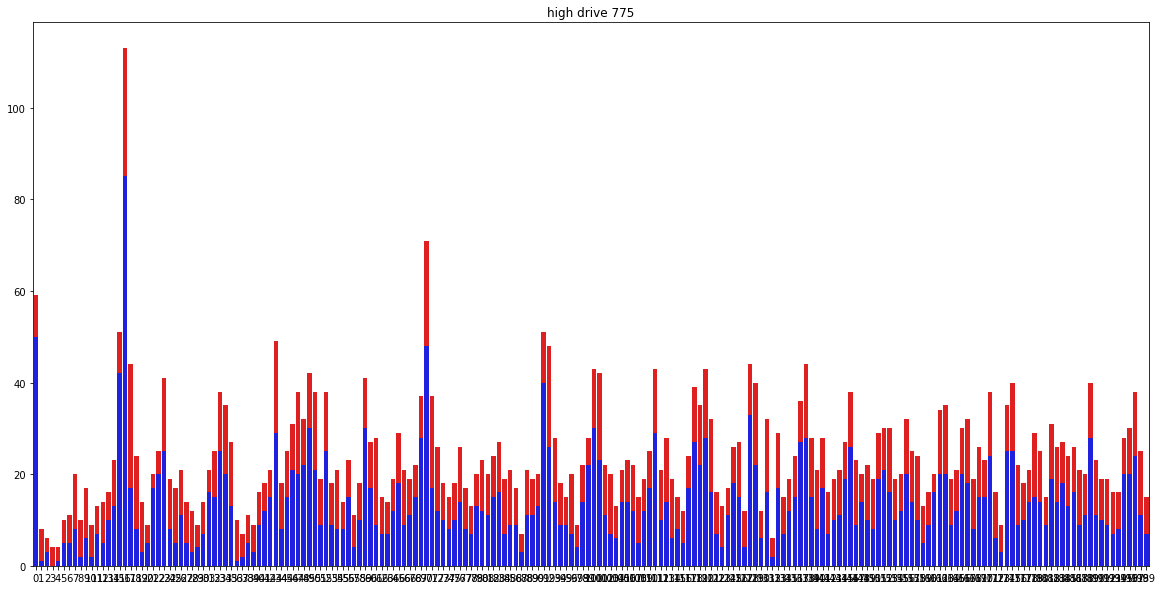

In [23]:
plot_hist(bins_first, 'high drive 775')

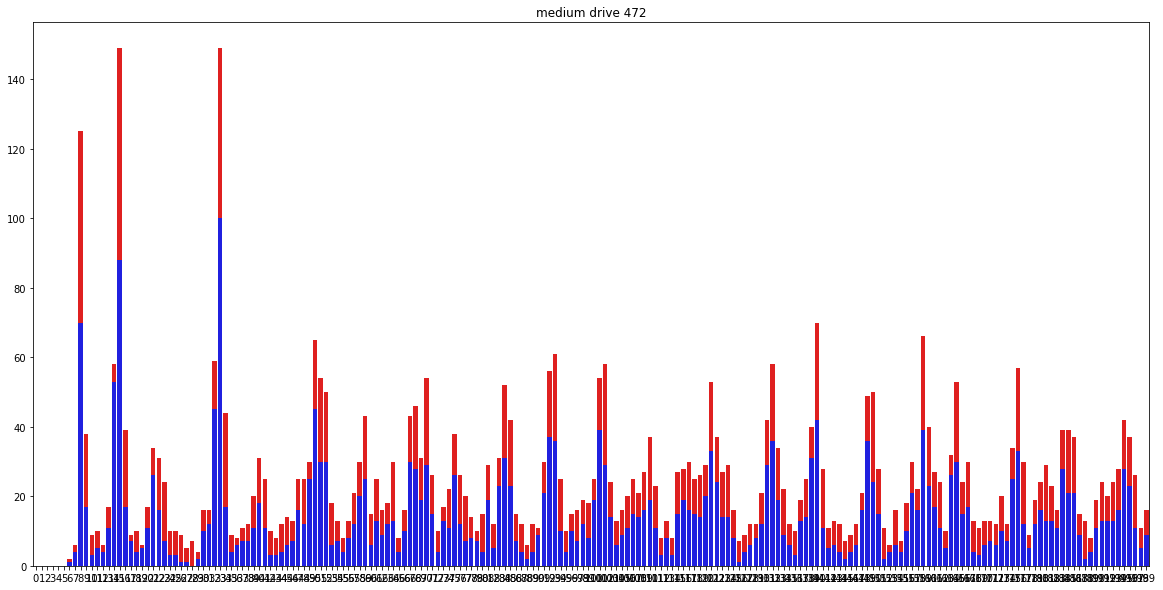

In [24]:
plot_hist(bins_second, 'medium drive 472')

In [5]:
def load_spike_pattern(index, root_pattern):
    file = root_pattern + str(index) + '.txt'
    return np.loadtxt(file)

def visualize_spikes(data):
    neuron_types = np.zeros(len(data))
    neuron_types[np.where(data[:, 1] > 300)] = 1
#     print('data[:, 1]', data[:, 1])
#     print('neuron_types', np.where(data[:, 1] > 300))
    neuron_types = neuron_types.reshape(-1, 1)
    data = np.concatenate((data, neuron_types), axis=1)
    
    
    df = pd.DataFrame(data, columns=["time", "neuron index", "type"])
    
#     print('df', df)
    sns.scatterplot(x="time", y="neuron index", data=df, hue="type", style="type", \
                   s=30)


In [7]:
root_pattern = './dataHitI_smallDrive/varyHitI'

spikes_min_data = load_spike_pattern(np.argmin(data[:,0]), root_pattern)
spikes_max_data = load_spike_pattern(np.argmax(data[:,0]), root_pattern)


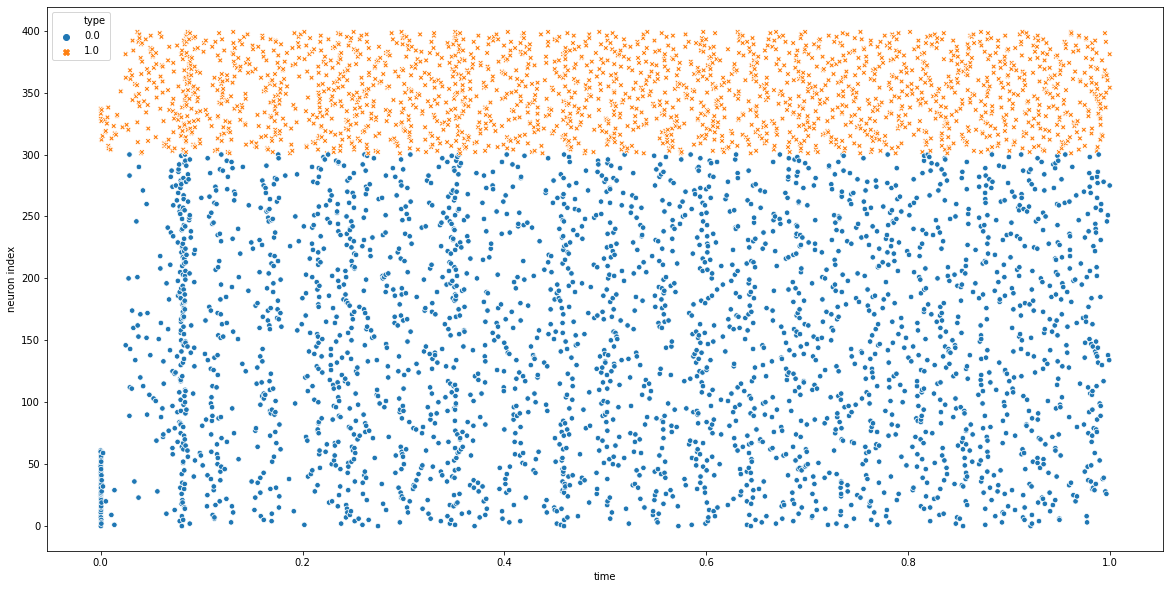

In [8]:
plt.rcParams["figure.figsize"] = (20,10) # width, height

visualize_spikes(spikes_max_data)


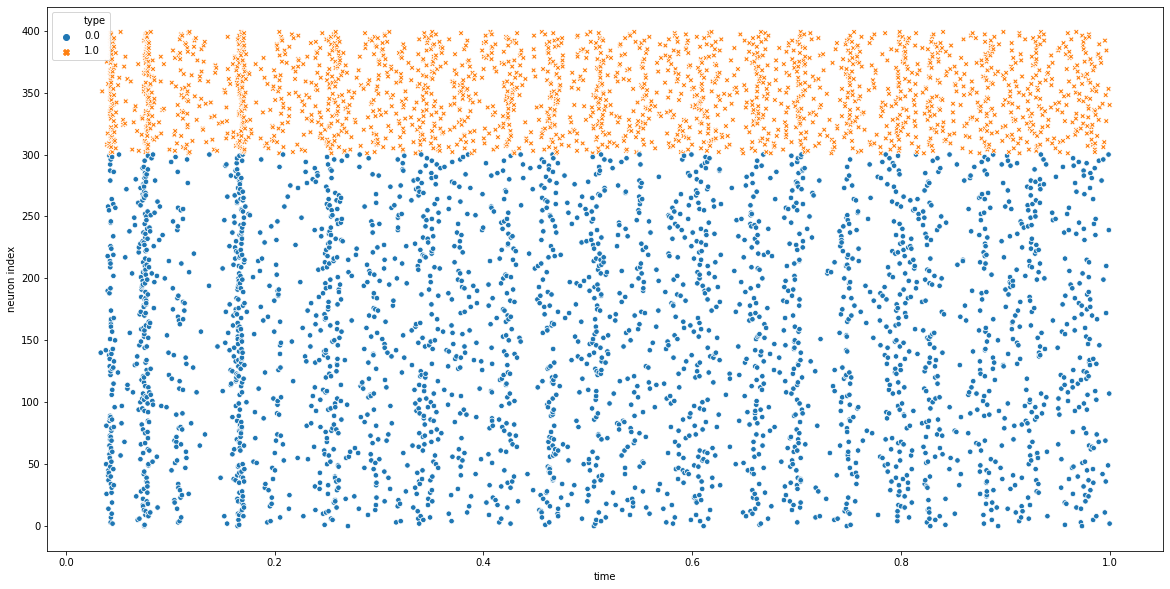

In [9]:
visualize_spikes(spikes_min_data)

## From sequential

In [ ]:
seq200 = np.loadtxt("spike200.000000.txt")
seq100 = np.loadtxt("spike100.000000.txt")
seq475 = np.loadtxt("spike475.000000.txt")
seq800 = np.loadtxt("spike800.000000.txt")
seq1000 = np.loadtxt("spike1000.000000.txt")

In [ ]:
plt.subplot(3,2,1)

visualize_spikes(seq100)

plt.subplot(3,2,2)
visualize_spikes(seq200)

plt.subplot(3,2,3)
visualize_spikes(seq475)

plt.subplot(3,2,4)
visualize_spikes(seq800)

plt.subplot(3,2,5)
visualize_spikes(seq1000)

In [ ]:
plt.subplot(2,1,1)

visualize_spikes(seq100)

plt.subplot(2,1,2)
visualize_spikes(seq1000)

In [ ]:
exp100 = np.loadtxt("./experiment/spike_verylowI.txt")
exp1000 = np.loadtxt("./experiment/spike_veryhighI.txt")

In [ ]:
plt.subplot(2,1,1)
visualize_spikes(exp100)
plt.subplot(2,1,2)
visualize_spikes(exp1000)

In [ ]:
visualize_spikes(seq200)

In [ ]:
visualize_spikes(seq475)

In [ ]:
visualize_spikes(seq800)

In [ ]:
visualize_spikes(seq1000)

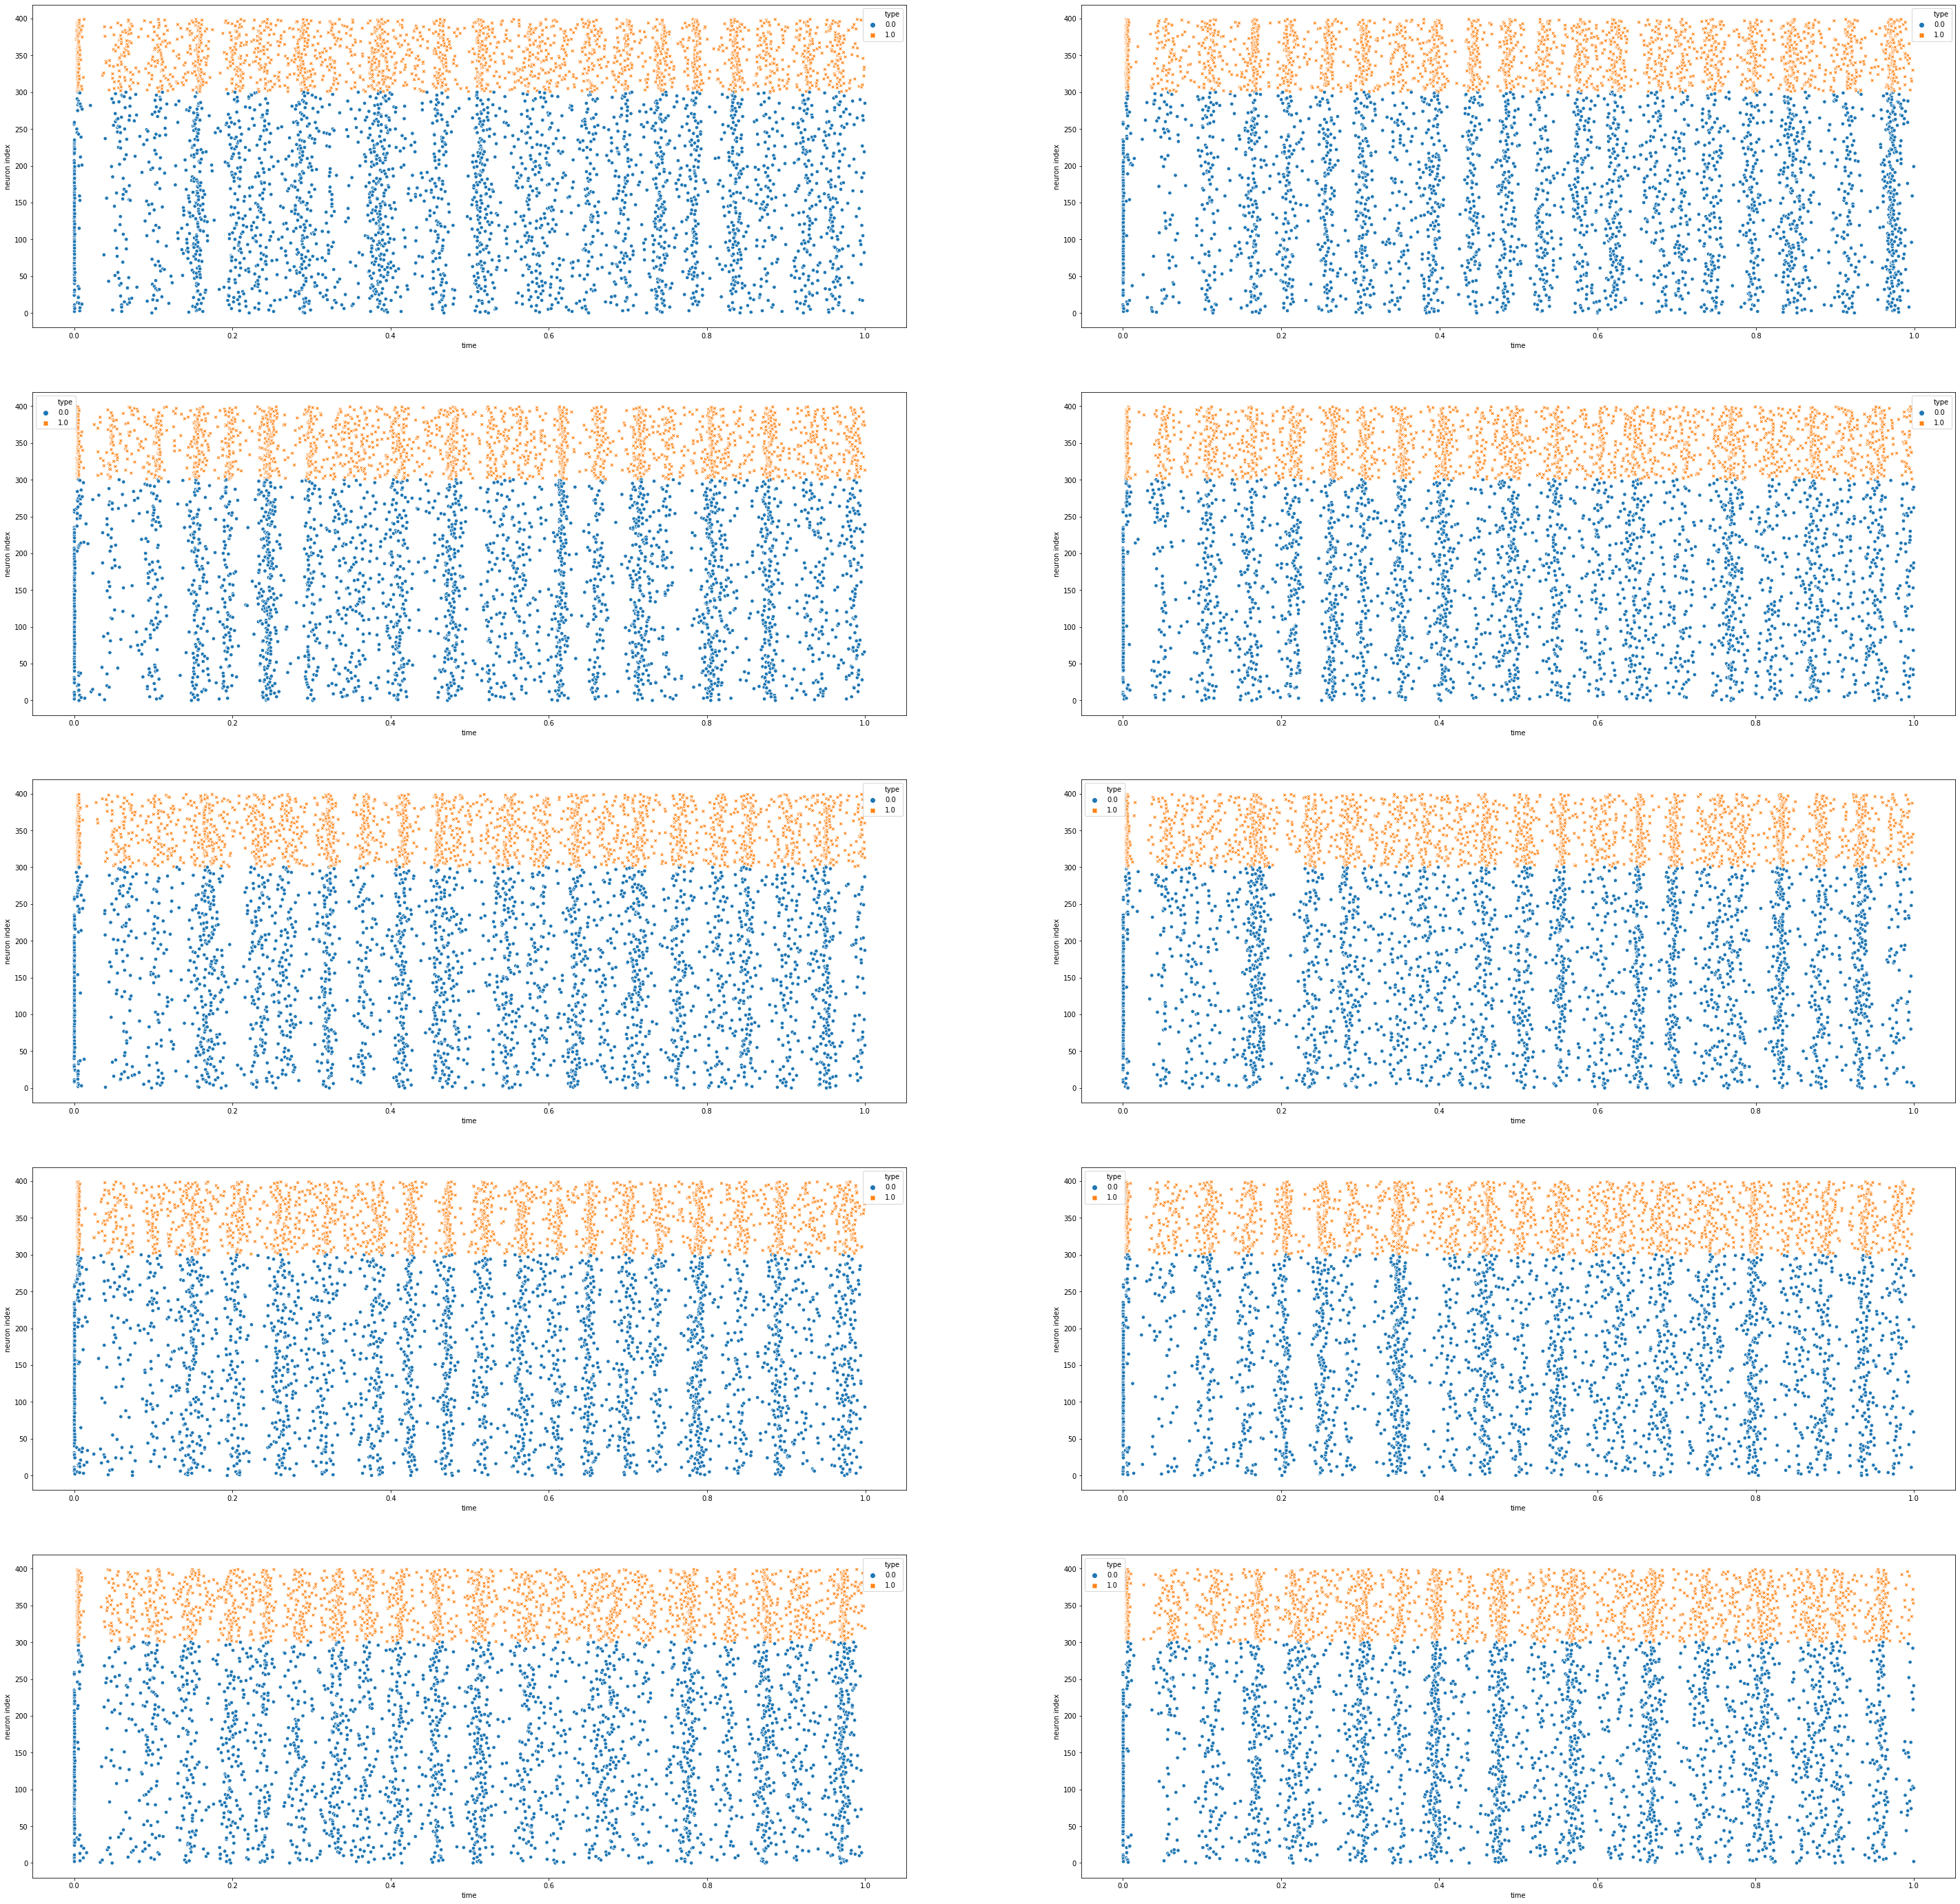

In [5]:
plt.rcParams["figure.figsize"] = (50,50) # width, height

for i in range(10):
    filename = 'spike100_' + str(i) + '.txt'
    spikes = np.loadtxt(filename)
    plt.subplot(5, 2, i+1)
    visualize_spikes(spikes)
    
    